In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category =FutureWarning)

In [2]:
data = pd.read_csv("playstore-analysis.csv")

In [3]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
data.shape

(10841, 13)

In [5]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.describe()

Rating           Size
count  9367.000000   10841.000000
mean      4.193338   21516.529524
std       0.537431   20746.537567
min       1.000000       8.500000
25%       4.000000    5900.000000
50%       4.300000   18000.000000
75%       4.500000   26000.000000
max      19.000000  100000.000000

## Data clean up – Missing value treatment

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<IPython.core.display.Javascript object>

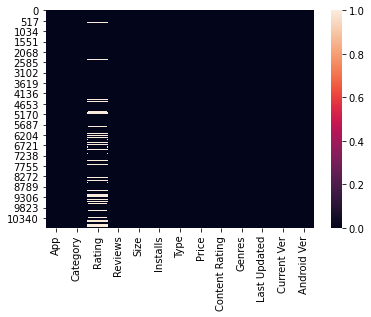

In [10]:
sns.heatmap(data.isnull())

#### Rating has more null values

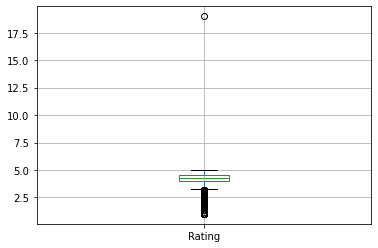

In [11]:
data.boxplot("Rating")

#### <span style=color:red>a. Drop records where rating is missing since rating is our target/study variable</span>

In [12]:
data[data.Rating>5]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [13]:
data.drop([10472], inplace = True)

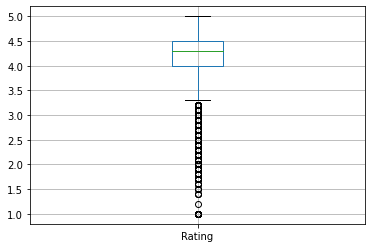

In [14]:
data.boxplot('Rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D08F6019A0>]],
      dtype=object)

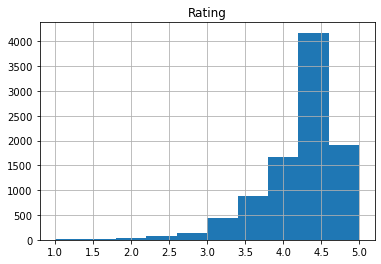

In [15]:
data.hist('Rating')

<span style=color:green>**Drop missing values of Rating because Rating is our target variable**</span>

In [16]:
data.dropna(axis=0, subset=['Rating'], inplace = True)

### <span style='color:black'> B. Check the null values for the Android Ver column.</span>
<span style='color:red'> 
 **i. Are all 3 records having the same problem?**</span>
    
<span style='color:red'> **ii. Drop the 3rd record i.e. record for “Life Made WIFI …”**</span>

<span style='color:red'> **iii. Replace remaining missing values with the mode**
</span>

### <span style='color:black'>C. Current ver – replace with most common value</span>

In [17]:
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace=True)

In [18]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# <span style='color:black'>2. Data clean up – correcting the data types</span>

#### <span style='color:red'> **A. Which all variables need to be brought to numeric types?**</span>

In [19]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<span style=color:red>**B. Price variable – remove $ sign and convert to float**

<span style=color:red>**C. Installs – remove ‘,’ and ‘+’ sign, convert to integer**

<span style=color:red>**D. Convert all other identified columns to numeric**</span>

In [20]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [21]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [22]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [23]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

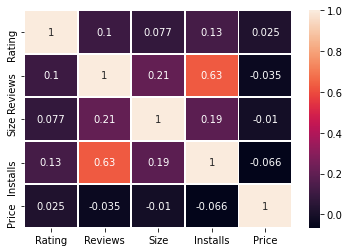

In [87]:
sns.heatmap(data.corr(), annot=True, linewidths=.9)

In [25]:
data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [26]:
data['Installs'].value_counts()

1.000000e+06    1577
1.000000e+07    1252
1.000000e+05    1150
1.000000e+04    1010
5.000000e+06     752
1.000000e+03     713
5.000000e+05     538
5.000000e+04     467
5.000000e+03     432
1.000000e+08     409
1.000000e+02     309
5.000000e+07     289
5.000000e+02     201
5.000000e+08      72
1.000000e+01      69
1.000000e+09      58
5.000000e+01      56
5.000000e+00       9
1.000000e+00       3
Name: Installs, dtype: int64

# <span style=color:blue>3. Sanity checks – check for the following and handle accordingly</span>

#### <span style=color:black>**A. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.**

<span style=color:red>**i. Are there any such records? Drop if so**</span>

<span style=color:red>**b. Reviews should not be more than installs as only those who installed can review the app.**

<span style=color:red>**i. Are there any such records? Drop if so.**</span>

In [27]:
data[data.Reviews>data.Installs].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [28]:
data.drop([2454, 4663, 5917, 6700, 7402, 8591, 10697], inplace=True)

# <span style=color:blue>Identify & Handle Outliers</span>

### <span style=color:black>**A. Price column**

<span style=color:red>**i. Make suitable plot to identify outliers in price**

<span style=color:red>**ii. Do you expect apps on the play store to cost $200? Check out these cases**

<span style=color:red>**iii. After dropping the useless records, make the suitable plot again to identify outliers**

<span style=color:red>**iv. Limit data to records with price < $30**</span>

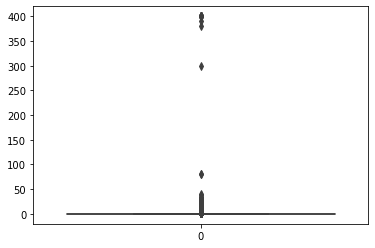

In [29]:
#price column
import seaborn as sns
sns.boxplot(data=data['Price'])

In [30]:
data.drop(data[data.Price>200].index,axis=0,inplace=True)

In [31]:
data.shape

(9344, 13)

In [32]:
data[data.Price>30].index

Int64Index([2253, 2301, 2365, 2402, 2414, 5360], dtype='int64')

In [33]:
data.drop([2253, 2301, 2365, 2402, 2414, 5360], inplace =True)

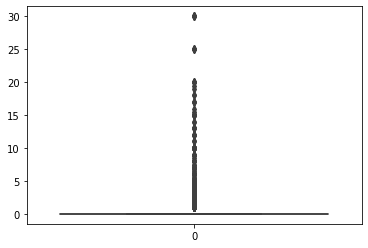

In [34]:
sns.boxplot(data=data['Price'])

C:\Users\STUDY\anaconda3.x\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


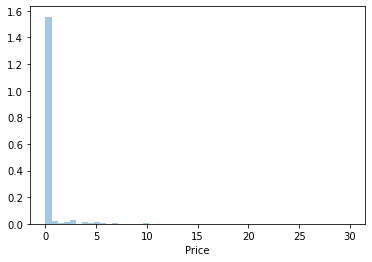

In [35]:
sns.distplot(data['Price'])

#### <span style=color:black>**B. Reviews column**

<span style=color:red>**i. Make suitable plot**

<span style=color:red>**ii. Limit data to apps with < 1 Million reviews**</span>

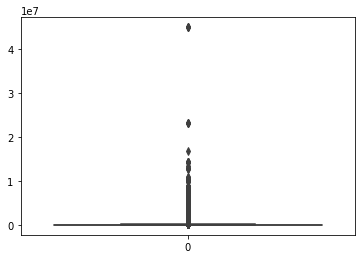

In [92]:
sns.boxplot(data=data['Reviews'])

In [37]:
sns.distplot(data['Reviews'])

In [38]:
new_data = data[data.Reviews<1000000]

In [39]:
new_data.shape

(8634, 13)

#### <span style=color:black>**C. Installs**

<span style=color:red>**i. What is the 95th percentile of the installs?**

<span style=color:red>**ii. Drop records having a value more than the 95th percentile**</span>

In [40]:
data['Installs'].describe()

count    9.338000e+03
mean     1.795108e+07
std      9.136965e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [41]:
np.percentile(data['Installs'],95)

100000000.0

In [93]:
for i in range(0,101,1):
    print(' The {} percentile of installs is {} '.format(i,np.percentile(data['Installs'],i)))

 The 0 percentile of installs is 5.0 
 The 1 percentile of installs is 50.0 
 The 2 percentile of installs is 100.0 
 The 3 percentile of installs is 100.0 
 The 4 percentile of installs is 100.0 
 The 5 percentile of installs is 500.0 
 The 6 percentile of installs is 500.0 
 The 7 percentile of installs is 1000.0 
 The 8 percentile of installs is 1000.0 
 The 9 percentile of installs is 1000.0 
 The 10 percentile of installs is 1000.0 
 The 11 percentile of installs is 1000.0 
 The 12 percentile of installs is 1000.0 
 The 13 percentile of installs is 1000.0 
 The 14 percentile of installs is 1000.0 
 The 15 percentile of installs is 5000.0 
 The 16 percentile of installs is 5000.0 
 The 17 percentile of installs is 5000.0 
 The 18 percentile of installs is 5000.0 
 The 19 percentile of installs is 5000.0 
 The 20 percentile of installs is 10000.0 
 The 21 percentile of installs is 10000.0 
 The 22 percentile of installs is 10000.0 
 The 23 percentile of installs is 10000.0 
 The 24 

In [43]:
data[data.Installs>np.percentile(data['Installs'],95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [44]:
data.drop(data[data.Installs>np.percentile(data['Installs'],95)].index, axis=0, inplace = True)

In [45]:
data.shape

(9208, 13)

## -----------------------------------------------------------------------------------------------------------------------------

# <span style=color:blue>Data Analysis to answer BUSINESS Questions</span>

## <span style=color:black>5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?</span>

<span style=color:red>**a. How do you explain this?** 
    
<span style=color:red>**b. What is the implication of this on your analysis?**</span>

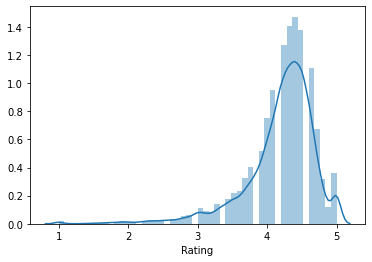

In [46]:
sns.distplot(data['Rating'])

In [47]:
#The skewness is in negative direction so it is negatively skewed(left skewed)
print("The skewnes of this data distribution is",data['Rating'].skew())

The skewnes of this data distribution is -1.8425872652320243


In [48]:
#the data left skewed so the median of this distribution is > mean of the distribution
print('The Median of this distribution {} is greater than mean {} of this distribution'.
      format(data.Rating.median(),data.Rating.mean()))

The Median of this distribution 4.3 is greater than mean 4.190117289313644 of this distribution


<span style=color:green>**So the skewness between -1 to 1 it states data is highly skewed towards lower values**</span>

## -----------------------------------------------------------------------------------------------------------------------------

## <span style=color:BLACK>6. What are the top Content Rating values?

<span style=color:red>**a. Are there any values with very few records?**

<span style=color:red>**b. If yes, drop those as they won’t help in the analysis**</span>


In [50]:
data['Content Rating'].value_counts()

Everyone           7303
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

<span style=color:green>Adults only 18+ and Unrated have very few records 4 only,
So we we can drop them.</span>

In [52]:
data[data['Content Rating'] == 'Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [53]:
data.drop(data[data['Content Rating'] == 'Adults only 18+'].index, axis=0, inplace=True)

In [54]:
data['Content Rating'].value_counts()

Everyone        7303
Teen            1055
Mature 17+       458
Everyone 10+     388
Unrated            1
Name: Content Rating, dtype: int64

In [55]:
data[data['Content Rating'] == 'Unrated'].index

Int64Index([8266], dtype='int64')

In [56]:
data.drop(data[data['Content Rating'] == 'Unrated'].index, axis=0, inplace =True)

In [57]:
data.shape

(9204, 13)

## ----------------------------------------------------------------------------------------------------------------------------

## <span style=color:black>7. Effect of size on rating
     
<span style=color:red>**a. Make a joinplot to understand the effect of size on rating**

<span style=color:red>**b. Do you see any patterns?**

<span style=color:red>**c. How do you explain the pattern?**</span>

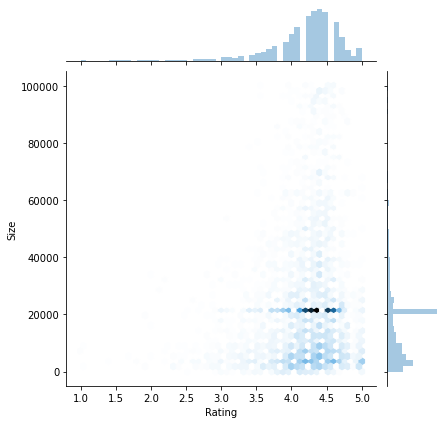

In [58]:
 sns.jointplot(y='Size',x='Rating',data=data, kind='hex')

<span style=color:green>**I dont think there is a relation between Size and Rating most of the concentration is in betwwen 4-4.5 in Rating and most of the app size is nearly 20MB**</span>

### 8. Effect of price on rating
  
<span style=color:red>**a. Make a jointplot (with regression line)**

<span style=color:red>**b. What pattern do you see?**

<span style=color:red>**c. How do you explain the pattern?**

<span style=color:red>**d. Replot the data, this time with only records with price > 0**

<span style=color:red>**e. Does the pattern change?**

<span style=color:red>**f. What is your overall inference on the effect of price on the rating**</span>

C:\Users\STUDY\anaconda3.x\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


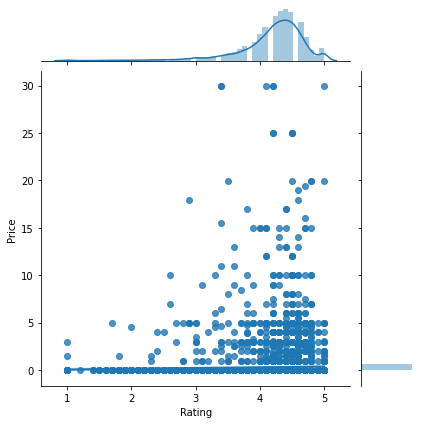

In [95]:
sns.jointplot(x='Rating',y='Price',data=data, kind='reg')

<span style=color:green>**1. lot of apps have 0 price that means free apps**

<span style=color:green>**2. lots of data spread around 0-5 in price**

<span style=color:green>**3. In this range we can find 1-5 rating**

<span style=color:green>**4. The reg line is in completely horizontal passing trough 0, so we can't say there a relation between this two columns**</span>

In [63]:
new_data2 = data.loc[data.Price>0]

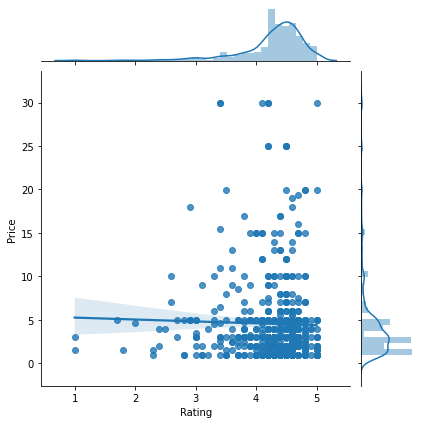

In [64]:
sns.jointplot(y='Price', x = 'Rating', data =new_data2, kind='reg')

<span style=color:green>**1. Generally increasing the Prices, doesn't have significant effect on Higher Rating.** 

<span style=color:green>**2. For Higher Price, Rating is High and almost constant ie greater than 4.**

<span style=color:green>**3. We can see there is a slightly negative relation.**

<span style=color:green>**4. Which apps have 0-5 in price they have great rating like 4-5.**

<span style=color:green>**5. There is some apps which have higher in price and also in rating.**

<span style=color:green>**6. But if we ignore the data that between 0-5 in price we can its positively related.**</span>

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 9. Look at all the numeric interactions together –
    
<span style=color:red>**a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'**</span>

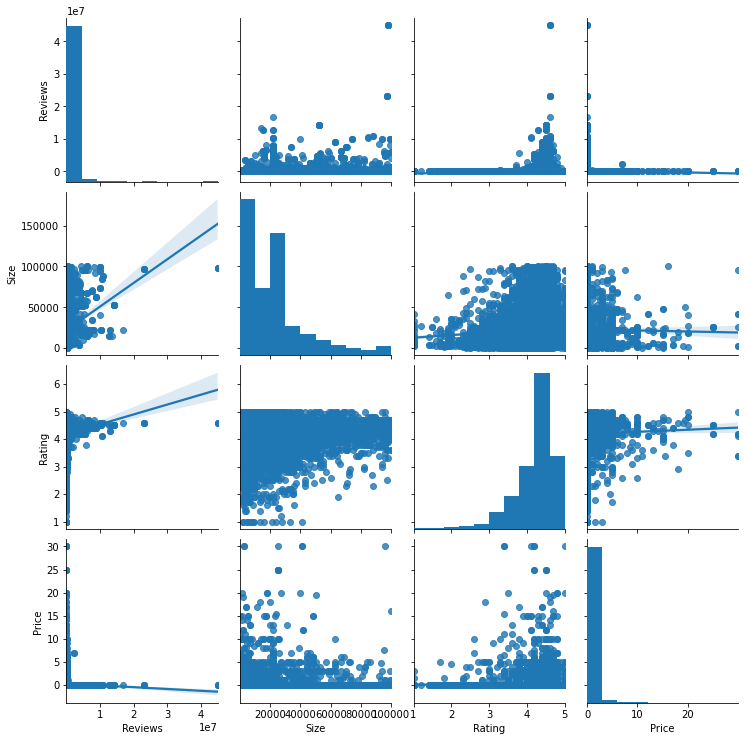

In [67]:
#sns.pairplot(data)
sns.pairplot(data,vars=['Reviews', 'Size', 'Rating', 'Price'],kind='reg')

<span style=color:green>**We can see that the Size and Reviews has best fit line with increasing direction**</span>

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 10. Rating vs. content rating
   
<span style=color:red>**a. Make a bar plot displaying the rating for each content rating**
       
<span style=color:red>**b. Which metric would you use? Mean? Median? Some other quantile?**

<span style=color:red>**c. Choose the right metric and plot**</span>

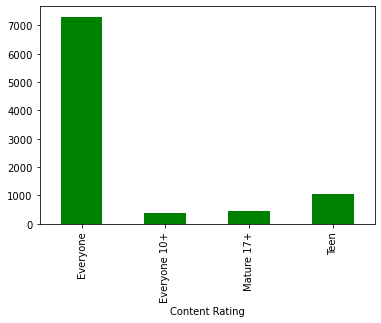

In [70]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")

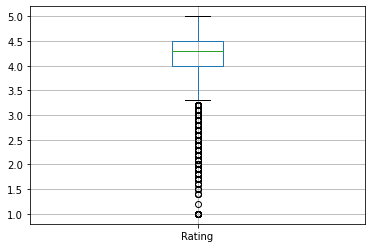

In [71]:
data.boxplot('Rating')

<span style=color:green>**There is too much outliers below min value**
    
<span style=color:green>**We must use Median to get rid of the outliers**</span>

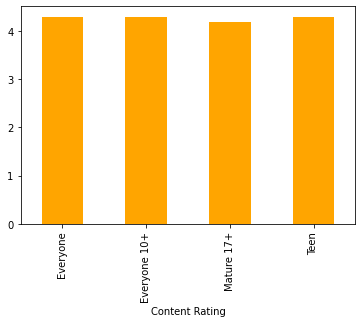

In [98]:
data.groupby(['Content Rating'])['Rating'].median().plot.bar(color="orange")

### 11. Content rating vs. size vs. rating – 3 variables at a time
<span style=color:red>**a. Create 5 buckets (20% records in each) based on Size**
     
<span style=color:red>**b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination**
    
<span style=color:red>**c. Make a heatmap of this -**</span>
    
<span style=color:#8B008B, font_size=200>**i. Annotated**</span>
        
<span style=color:green>**ii. Greens color map**</span>
    
<span style=color:red>**d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?**</span>

In [73]:
bins=[0,20000,40000,60000,80000,100000]
data['size_buckets'] = pd.cut(data['Size'],bins,labels=['0-20mb','20mb-40mb','40mb-60mb','60mb-80mb','80mb-100mb'])

In [74]:
pivot=pd.pivot_table(data, values='Rating', index='size_buckets', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))

In [75]:
pivot

Content Rating  Everyone  Everyone 10+  Mature 17+  Teen
size_buckets                                            
0-20mb               3.8          4.02         3.5   3.9
20mb-40mb            4.0          4.00         4.0   4.0
40mb-60mb            3.9          4.10         4.1   4.0
60mb-80mb            4.0          4.20         4.0   4.0
80mb-100mb           4.1          4.30         4.0   4.1

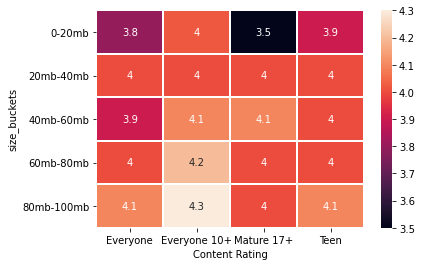

In [81]:
sns.heatmap(pivot, annot=True, linewidths=.9)

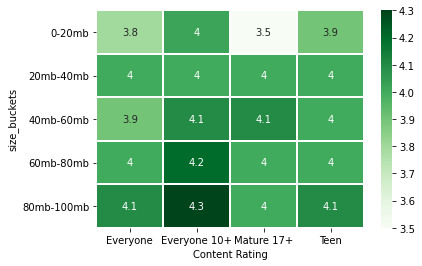

In [84]:
sns.heatmap(pivot, annot=True, linewidths=.9,cmap='Greens')

###### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

#### Answer

<span style=color:green>**1. Lighters App is always convient for devices and flexibility is smooth of all categories**
    
<span style=color:green>**2. But nowdays games like PUBG, Asphalt 9 are more popular games are always on top-ratings**

<span style=color:green>**3. Currently devices comes with better configuration, that's why the heavier apps also load easily with internet connectivity.**

<span style=color:green>**4. But always lighter will convient for less configurations devices, their is low chance to hang device beacause of lighter apps**</span>

## <span style=color:#8B008B>DONE BY GANESH DEVARE</span>